In [21]:
from utils import get_lexicon, preprocess, count_variants
import logging
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.WARNING)


lex = get_lexicon(min_length=3, only_verified=True)

f = "sample.txt"
with open(f, "r") as file:
    sample = file.read()

In [22]:
count_variants(sample, lex)


({'A': 6, 'B': 1},
 {'airplanes': {'variant': 'A', 'count': 1},
  'traveler': {'variant': 'A', 'count': 5},
  'analyses': {'variant': 'B', 'count': 1}})

In [23]:
import pandas as pd
for file in ["NOW-GB-corpus-sample.json",  "NOW-US-corpus-sample.json", "NOW-corpus-sample.json", "GloWBe-and-NOW-corpus-sample.json"]:
    df = pd.read_json(f"test-data/{file}")
    df["variant_detector_count"] = df.lower_text.apply(lambda s: count_variants(s, lex)[0])
    df["variant_detector_breakdown"] = df.lower_text.apply(lambda s: count_variants(s, lex)[1])
    df.to_json(f"test-data/{file.replace('.json', '-output.json')}", orient="records", indent=4)

In [24]:
df.country.value_counts()

GB    724
US    721
Name: country, dtype: int64

In [25]:
df.columns

Index(['id', 'words', 'country', 'website', 'title', 'text', 'lower_text',
       'corpus', 'variant_detector_count', 'variant_detector_breakdown'],
      dtype='object')

In [26]:
df["A_B"] = df.variant_detector_count.apply(lambda d:d.get("A", 0) - d.get("B", 0))
df["A_B_normalized"] = df.A_B / df.words

df.head(2)
    

,id,words,country,website,title,text,lower_text,corpus,variant_detector_count,variant_detector_breakdown,A_B,A_B_normalized
0,11241,397,US,Kotaku,"Author of The Warriors, Cult Film Adapted to H...","<p> Sol Yurick , the writer whose 1965 novel ""...","<p> sol yurick , the writer whose 1965 novel ""...",NOW,{},{},0,0.000000
1,11242,757,US,Michigan Radio,That's What They Say: Dialect Society chooses ...,<h> That 's What They Say : Dialect Society ch...,<h> that 's what they say : dialect society ch...,NOW,{'A': 3},"{'favorites': {'variant': 'A', 'count': 1}, 'b...",3,0.003963


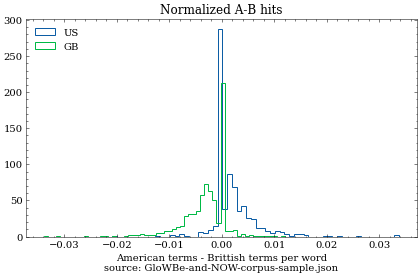

In [27]:
import matplotlib.pyplot as plt
plt.style.use(["science", "no-latex"])
plt.figure(figsize=(7,4))
for c in df.country.unique():
    subset = df.loc[df.country == c, "A_B_normalized"]
    plt.hist(subset.values, label=c, histtype="step", bins=60)

plt.xlabel("American terms - Brittish terms per word\n"+"source: "+"GloWBe-and-NOW-corpus-sample.json")
plt.title("Normalized A-B hits")
plt.legend()

plt.savefig("images/A-B_normalized.png")
plt.show()

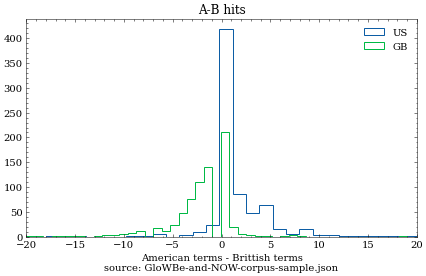

In [28]:
import matplotlib.pyplot as plt
plt.style.use(["science", "no-latex"])
plt.figure(figsize=(7,4))
for c in df.country.unique():
    subset = df.loc[df.country == c, "A_B"]
    plt.hist(subset.values, label=c, histtype="step", bins=60)

plt.xlabel("American terms - Brittish terms\n"+"source: "+"GloWBe-and-NOW-corpus-sample.json")
plt.title("A-B hits")
plt.legend()
plt.xlim((-20, 20))
plt.savefig("images/A-B.png")
plt.show()

In [29]:
df.A_B.value_counts()[0]

496

In [30]:
df.shape

(1445, 12)